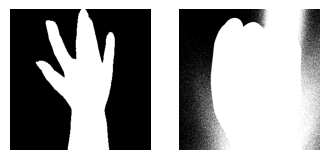

In [1]:
import pandas as pd
import cv2
name=['kertas.png','rock-hires1.png']
from matplotlib import pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(4,4))
for i,j in zip(ax,name):
    im=cv2.imread(f"C:/Users/User/Documents/{j}")
    #convert to gray
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    #piksel more than 250 convert to 255, and pixel less than 250 convert to 0
    biner=cv2.threshold(gray,250,255,cv2.THRESH_BINARY)[1]
    from matplotlib import pyplot as plt
    i.imshow(~biner,cmap='gray')
    i.axis('off')

    Karena color skin beda maka proses menjadi biner tidak maksimal

**Working with YRCB or HSV** the best for different tone skin, luminance (brighnes) we can fokus to separate birghtness tone skin by luminance

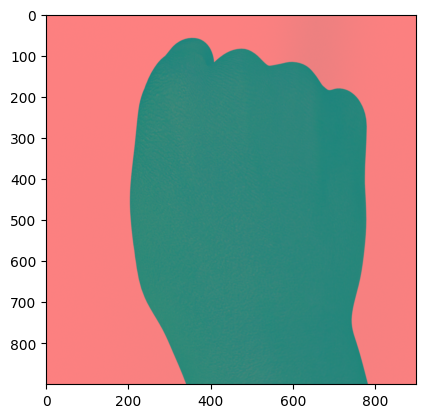

In [36]:
im=cv2.imread(f"C:/Users/User/Documents/rock-hires1.png")
yrcb_image=cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)
plt.imshow(yrcb_image)


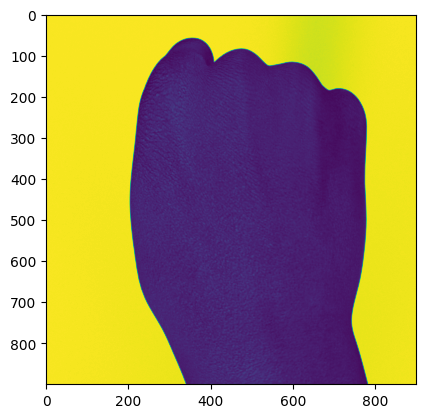

In [37]:
#extract luminance 
lum_image=yrcb_image[:,:,0]
plt.imshow(lum_image)

**plot histogram of luminance**

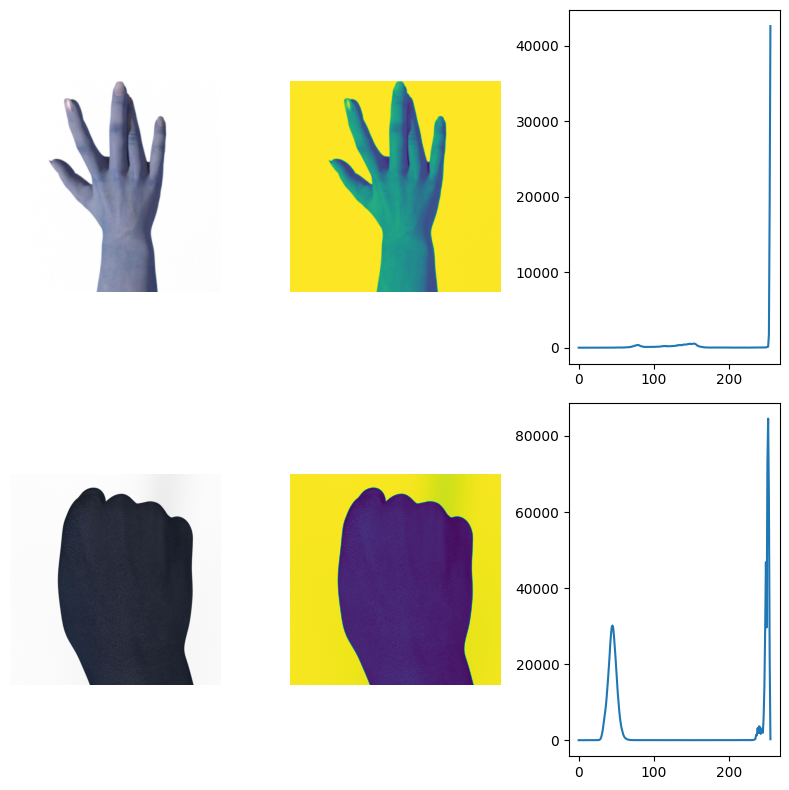

In [24]:
fig,ax=plt.subplots(2,3,figsize=(8,8))
for i,j in zip(range(2),name):
    im=cv2.imread(f"C:/Users/User/Documents/{j}")
    yrcb_image=cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)
    y=yrcb_image[:,:,0]
    #channel inde x 0, bins 256, and value range 0-256
    hist=cv2.calcHist([y],[0],None,[256],[0,256])
    kum={}
    kum['img']=im
    kum['yrcb']=y
    kum['hist']=hist
    for k,l in zip(range(3),kum.keys()):
        if l=='hist':
            ax[i][k].plot(kum[l])
        else:
            ax[i][k].imshow(kum[l])
            ax[i][k].axis('off')
plt.tight_layout()

there's different distributin of Y between black and white color

**thresholding** : menggunaka automatic threshold (thresh_otsu) yang bekerja baik pada problem skin segmentation

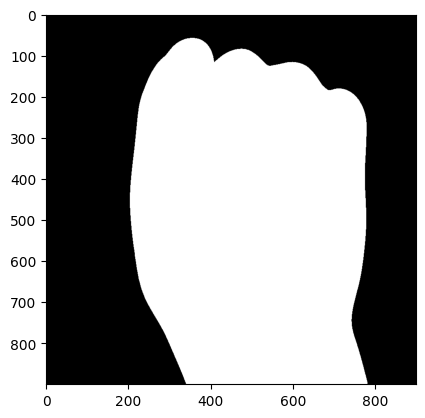

In [39]:
thresh_value,thresh_img=cv2.threshold(lum_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh_img,cmap='gray')
#define kernel size ukuran filter
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#menutupi lubang pada object
tr_image=cv2.morphologyEx(thresh_img,cv2.MORPH_CLOSE,kernel,iterations=2)
plt.imshow(~tr_image,cmap='gray')

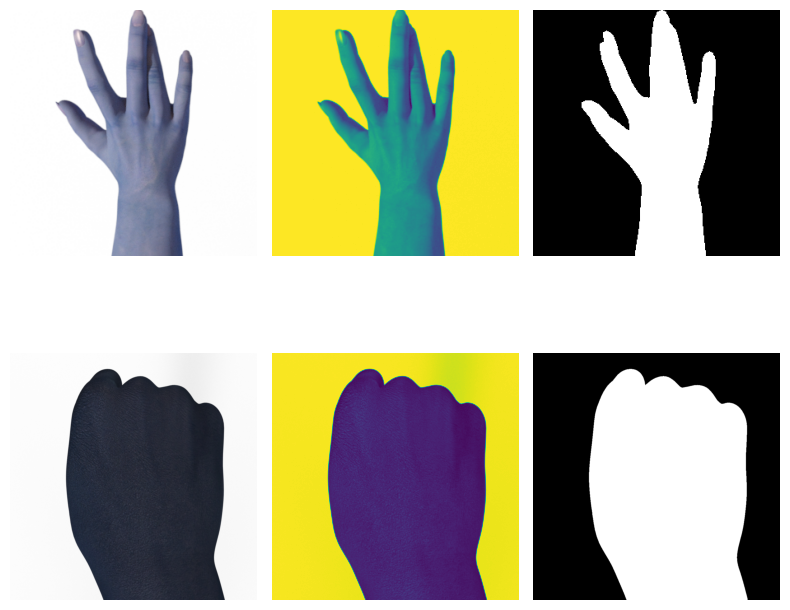

In [47]:
fig,ax=plt.subplots(2,3,figsize=(8,8))
for i,j in zip(range(2),name):
    im=cv2.imread(f"C:/Users/User/Documents/{j}")
    yrcb_image=cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)
    y=yrcb_image[:,:,0]
    thresh_value,thresh_img=cv2.threshold(y,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #define kernel size ukuran filter
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    #menutupi lubang pada object
    tr_image=cv2.morphologyEx(thresh_img,cv2.MORPH_CLOSE,kernel,iterations=2)
    kum={}
    kum['img']=im
    kum['yrcb']=y
    kum['thresh']=tr_image
    for k,l in zip(range(3),kum.keys()):
        if l=='thresh':
            ax[i][k].imshow(~kum[l],cmap='gray')
            ax[i][k].axis('off')

        else:
            ax[i][k].imshow(kum[l])

            ax[i][k].axis('off')
plt.tight_layout()